<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [4]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

In [5]:
!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [60]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [61]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [29]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [30]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_d=[]
    for i,row in df_final.iterrows():
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
        except:
            d1 = set()
        
        num_followers_d.append(len(d1))
    
    return  num_followers_d

In [31]:
df_final_train['num_followers_d']= compute_features_stage1(df_final_train)
    
df_final_test['num_followers_d'] = compute_features_stage1(df_final_test)

In [33]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9208580423164213 test Score 0.9153396916095962
Estimators =  50 Train Score 0.9235484277257651 test Score 0.9189895286855024
Estimators =  100 Train Score 0.9250773344518429 test Score 0.9207760200535041
Estimators =  250 Train Score 0.9235196852041778 test Score 0.9186872294827079
Estimators =  450 Train Score 0.9233275548779215 test Score 0.9166754185133064


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

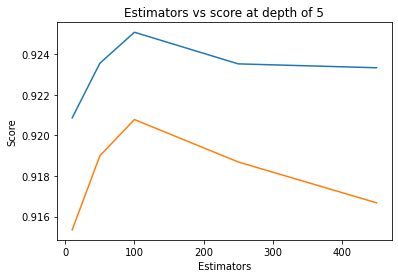

In [34]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.91437125748503 test Score 0.9054020309638755
depth =  9 Train Score 0.9550015326453458 test Score 0.9231158214112639
depth =  11 Train Score 0.9604101395613787 test Score 0.9231807920332512
depth =  15 Train Score 0.963592355913837 test Score 0.926403291489987
depth =  20 Train Score 0.9639394092912509 test Score 0.9265771727484717
depth =  35 Train Score 0.9636116685925116 test Score 0.9267206052327415
depth =  50 Train Score 0.9636116685925116 test Score 0.9267206052327415
depth =  70 Train Score 0.9636116685925116 test Score 0.9267206052327415
depth =  130 Train Score 0.9636116685925116 test Score 0.9267206052327415


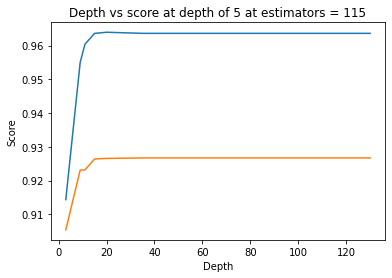

In [35]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [36]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25 , return_train_score = True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96194874 0.96216817 0.95997545 0.96198196 0.96327032]


In [37]:
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean train scores [0.96260098 0.96261821 0.96050166 0.96254342 0.96410361]


In [38]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [39]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [40]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [41]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9640944498539435
Test f1 score 0.926510180043749


In [42]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


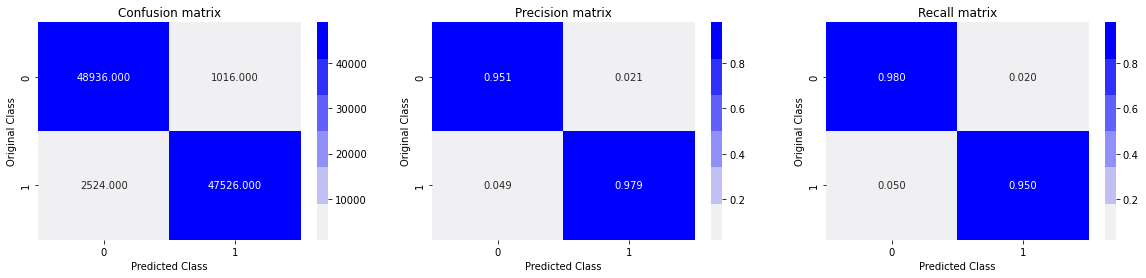

Test confusion_matrix


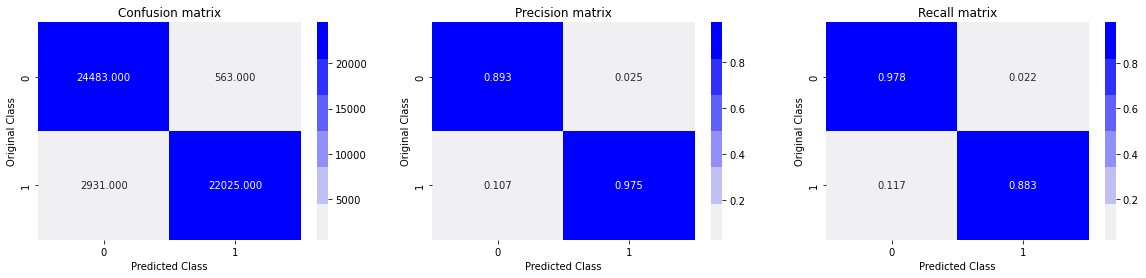

In [43]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

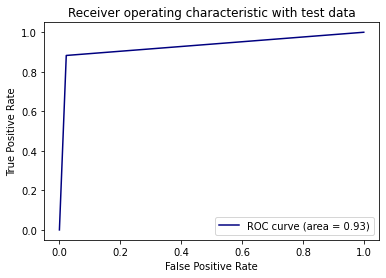

In [44]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

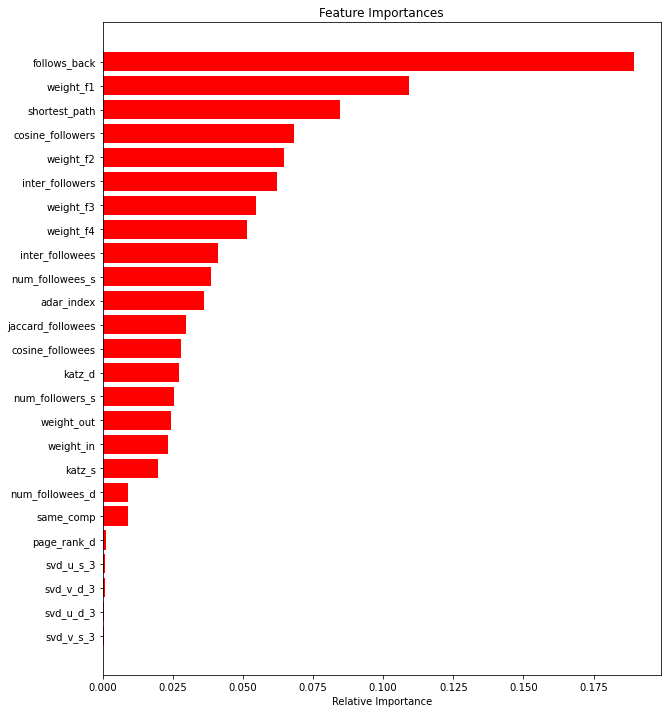

In [45]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [108]:
def preferential_attachment(df_final):
    preferential_attachment_followers = df_final['num_followers_s']*df_final['num_followers_d']
    preferential_attachment_followees = df_final['num_followees_s']*df_final['num_followees_d']
    return preferential_attachment_followers , preferential_attachment_followees

In [109]:
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [110]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_d=[]
    for i,row in df_final.iterrows():
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
        except:
            d1 = set()
        
        num_followers_d.append(len(d1))
    
    return  num_followers_d

In [111]:
df_final_train['num_followers_d']= compute_features_stage1(df_final_train)
    
df_final_test['num_followers_d'] = compute_features_stage1(df_final_test)

In [112]:
df_final_train['preferential_attachment_followers'] , df_final_train['preferential_attachment_followees'] = preferential_attachment(df_final_train)
df_final_test['preferential_attachment_followers'] , df_final_test['preferential_attachment_followees'] = preferential_attachment(df_final_test)

In [113]:
train_graph = nx.read_edgelist('train_pos_after_eda.csv' , delimiter = ',' , create_using = nx.DiGraph() )

In [114]:
def SVD(x , S):
    try :
        z = sadj_dict[x]
        return S[z]
    except :
        return [0,0,0,0,0,0]

In [115]:
sadj_col = sorted(train_graph.nodes())
sadj_dict = {val : idx  for idx , val in enumerate(sadj_col)}

In [116]:
Adj = nx.adjacency_matrix(train_graph , nodelist = sorted(train_graph.nodes())).asfptype()

In [117]:
U,s,V = svds(Adj , k = 6)
print(Adj.shape)
print(U.shape)
print(s.shape)
print(V.shape)

(1780722, 1780722)
(1780722, 6)
(6,)
(6, 1780722)


In [118]:
def np_dot(df_final):
    np_dot_u = []
    np_dot_v = []
    for index , row in df_final.iterrows():
        a = SVD(row['source_node'] , U)
        b = SVD(row['destination_node'] , U)
        np_dot_u.append(np.dot(a , b))
        c = SVD(row['source_node'] , V.T)
        d = SVD(row['destination_node'] , V.T)
        np_dot_v.append(np.dot(c , d))
    return np_dot_u , np_dot_v

In [119]:
df_final_train['np_dot_u'] , df_final_train['np_dot_v'] = np_dot(df_final_train)
df_final_test['np_dot_u'] , df_final_test['np_dot_v'] = np_dot(df_final_test)

In [120]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [121]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [122]:
estimators = [10 , 50 , 100 , 150 , 200]
train_scores = []
test_scores = []
for i in estimators :
    clf = xgb.XGBClassifier(n_estimators = i , max_depth = 5 , n_jobs = -1)
    clf.fit(df_final_train , y_train)
    train_scores.append(f1_score(y_train , clf.predict(df_final_train)))
    test_scores.append(f1_score(y_test , clf.predict(df_final_test)))

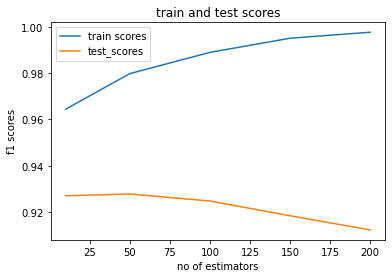

In [123]:
plt.plot(estimators , train_scores , label = 'train scores')
plt.plot(estimators , test_scores , label = 'test_scores')
plt.title('train and test scores')
plt.xlabel('no of estimators')
plt.ylabel('f1 scores')
plt.legend()
plt.show()


In [124]:
depth = [3,5,7,9,11,13,15,20]
train_scores = []
test_scores = []
for i in depth :
    clf = xgb.XGBClassifier(max_depth = i , n_estimators = 100 , n_jobs = -1)
    clf.fit(df_final_train , y_train)
    train_sc = f1_score(y_train , clf.predict(df_final_train))
    test_sc = f1_score(y_test , clf.predict(df_final_test))
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

depth =  3 Train Score 0.978548488092593 test Score 0.9048897743514227
depth =  5 Train Score 0.9889293707908022 test Score 0.9248589375066538
depth =  7 Train Score 0.9981197743729248 test Score 0.924566031313819
depth =  9 Train Score 1.0 test Score 0.9245391337628373
depth =  11 Train Score 1.0 test Score 0.926320706641753
depth =  13 Train Score 1.0 test Score 0.9261767765769975
depth =  15 Train Score 1.0 test Score 0.9275731161587242
depth =  20 Train Score 1.0 test Score 0.9281353345204783


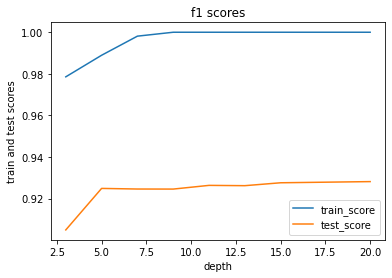

In [125]:
plt.plot(depth , train_scores , label = 'train_score')
plt.plot(depth , test_scores , label = 'test_score')
plt.title('f1 scores')
plt.xlabel('depth')
plt.ylabel('train and test scores')
plt.legend()
plt.show()

In [126]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "learning_rate": [0.01 , 0.05 , 0.1],
              "subsample" : [0.5 , 0.7 , 0.9],
              "min_child_weight" : [3,5,7,9],
              "reg_lambda" : [50,100,150,200]
             }
clf = xgb.XGBClassifier(n_jobs = -1)
rf = RandomizedSearchCV(clf , param_distributions = param_dist , random_state = 42 , return_train_score = True)
rf.fit(df_final_train , y_train)
print('mean test score is ' , rf.cv_results_['mean_test_score'])
print('mean_train_score is ' , rf.cv_results_['mean_train_score'])

mean test score is  [0.97679044 0.96898061 0.97747042 0.97411049 0.97531047 0.97693044
 0.9740405  0.97765042 0.97747043 0.96979059]
mean_train_score is  [0.9799354  0.97022559 0.98293284 0.97603048 0.97764295 0.9801429
 0.97538049 0.98280284 0.98143537 0.97176056]


In [127]:
print(rf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=14, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=111,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=50, ...)


In [128]:
clf = rf.best_estimator_

In [130]:
clf.fit(df_final_train , y_train)
y_train_predicted = clf.predict(df_final_train)
y_test_predicted = clf.predict(df_final_test)

In [131]:
print('train_f1_score :' , f1_score(y_train , y_train_predicted))
print('test_f1_score :' , f1_score(y_test , y_test_predicted))

train_f1_score : 0.9830692730457189
test_f1_score : 0.9328214971209213


train_confusion_matrix 


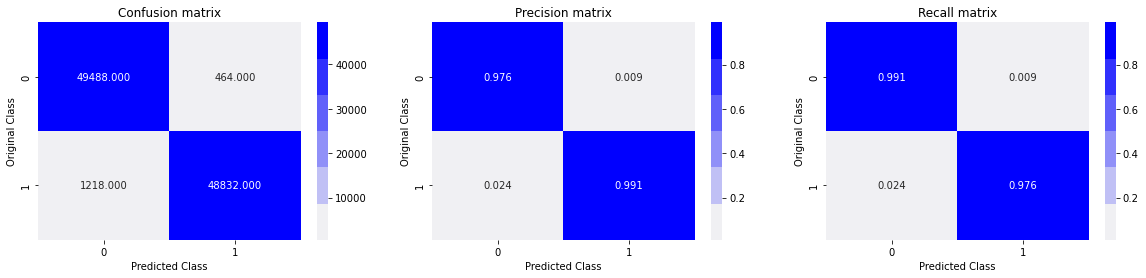

test_confusion_matrix 


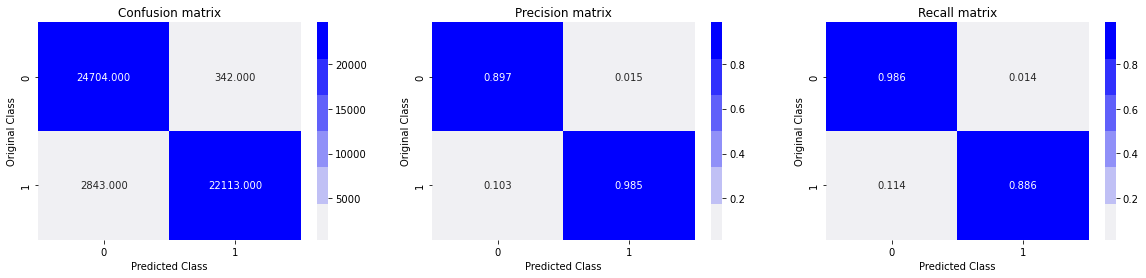

In [132]:
print('train_confusion_matrix ')
plot_confusion_matrix(y_train , y_train_predicted)
print('test_confusion_matrix ')
plot_confusion_matrix(y_test , y_test_predicted)

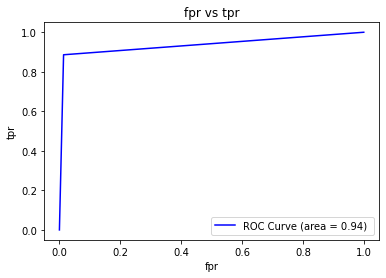

In [133]:
fpr,tpr,thr = roc_curve(y_test , y_test_predicted)
auc_sc = auc(fpr , tpr)
plt.plot(fpr , tpr , color = 'b' , label = 'ROC Curve (area = %0.2f) ' %auc_sc )
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('fpr vs tpr')
plt.legend()
plt.show()

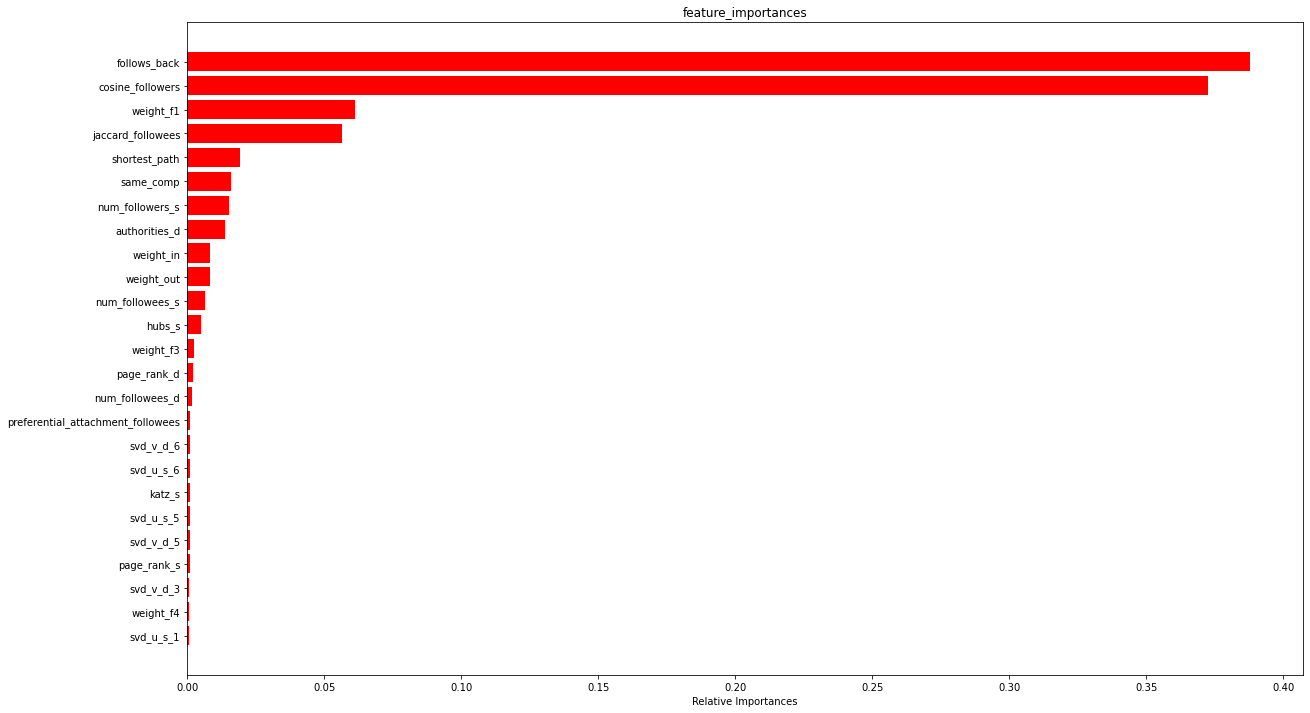

In [134]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[-25:]
plt.figure(figsize = (20,12))
plt.title('feature_importances')
plt.barh(range(len(indices)) , importances[indices] , color = 'r' , align = 'center')
plt.yticks(range(len(indices)) , [features[i] for i in indices])
plt.xlabel('Relative Importances')
#plt.legend()
plt.show()

In [135]:
from prettytable import PrettyTable

In [142]:
x = PrettyTable()

In [143]:
x.field_names = ["Model", "Train F1 Score" , "Test F1 Score"]

In [144]:
x.add_row(["Random Forest Classifier","0.9640944498539435","0.926510180043749"])
x.add_row(["XGBoost with new features" , "0.9830692730457189","0.9328214971209213"])

In [145]:
print(x)

+---------------------------+--------------------+--------------------+
|           Model           |   Train F1 Score   |   Test F1 Score    |
+---------------------------+--------------------+--------------------+
|  Random Forest Classifier | 0.9640944498539435 | 0.926510180043749  |
| XGBoost with new features | 0.9830692730457189 | 0.9328214971209213 |
+---------------------------+--------------------+--------------------+


XGBoost gives a better f1 score for both train and test datasets as compared to the Random Forest Classifier
Follows back is the feature with most importance even after including the new features followed by cosine followers